### Clustering
Identify clusters of similar players based on their attributes.

Use K-Means or hierarchical clustering to group players by their performance metrics (e.g., passing accuracy, finishing, dribbling).
The goal is to discover patterns in player attributes such as attacking and defending skills, and identify player roles (e.g., defenders vs attackers) from the clusters.

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from  sklearn.preprocessing import StandardScaler

In [2]:
# Get the data from the database
conn = sqlite3.connect('database.sqlite')
df_pp_attributes = pd.read_sql('SELECT pa.crossing AS crossing, pa.finishing AS finishing, pa.dribbling as dribbling, pa.long_passing AS long_passing FROM Player p JOIN Player_Attributes pa ON p.player_api_id = pa.player_api_id', conn)
conn.close()

In [7]:
# Data preprocessing
df_pp_attributes = df_pp_attributes.dropna()
df_pp_attributes.head(3)

,crossing,finishing,dribbling,long_passing
0,49.0,44.0,51.0,64.0
1,49.0,44.0,51.0,64.0
2,49.0,44.0,51.0,64.0


In [8]:
# Scale the data
features = ['crossing', 'finishing', 'dribbling', 'long_passing']
scaler =  StandardScaler()
df_pp_attributes_scaled = scaler.fit_transform(df_pp_attributes[features])

In [20]:
kmeans = KMeans(n_init='auto', n_clusters=3, random_state=0)
df_pp_attributes['cluster'] = kmeans.fit_predict(df_pp_attributes_scaled)

In [ ]:
# Map clusters to the categories to know which cluster represents which category ('Good', 'Intermediate', and 'Bad') in order to label the clusters and color them


In [11]:
# Perform dimensionality reduction using PCA in order to visualize the clusters in 2D
pca = PCA(n_components=2)
df_pp_attributes_pca = pca.fit_transform(df_pp_attributes_scaled)
df_pp_attributes['PCA1'] = df_pp_attributes_pca[:, 0]
df_pp_attributes['PCA2'] = df_pp_attributes_pca[:, 1]

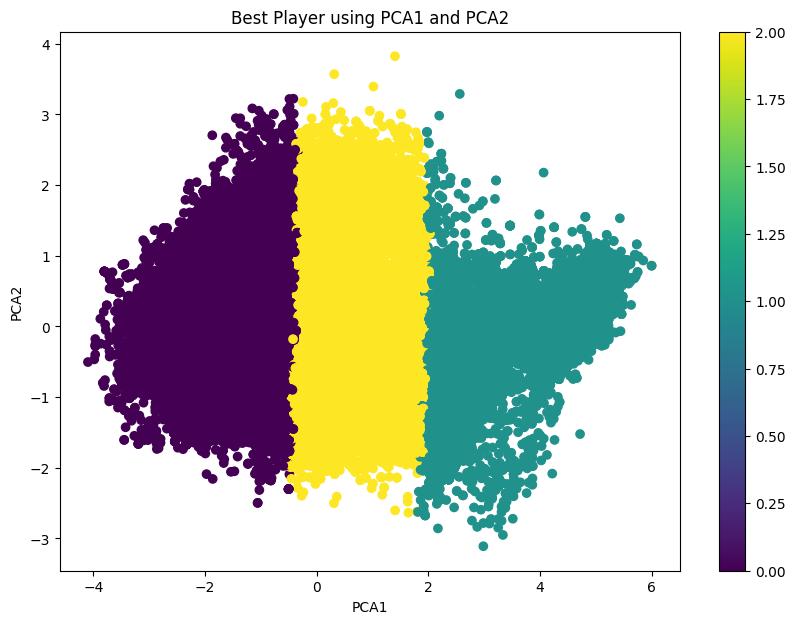

In [21]:
# Visualize the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(df_pp_attributes['PCA1'], df_pp_attributes['PCA2'], c=df_pp_attributes['cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Best Player using PCA1 and PCA2')
plt.colorbar()
plt.show()